In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re

In [2]:
df1 = pd.read_csv('../data/State of Washington Electric_Vehicle_Population_Dataset.csv')
df1

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14,227153587,POINT (-120.477805 46.553505),PACIFICORP,53077002803
1,5YJSA1E24G,King,Seattle,WA,98103,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033004902
2,1N4AZ1CP5J,King,Shoreline,WA,98177,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033020100
3,5YJ3E1EA6J,Island,Coupeville,WA,98239,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,53029971100
4,1G1FW6S00H,Kitsap,Seabeck,WA,98380,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,35,125032974,POINT (-122.847462 47.63836),PUGET SOUND ENERGY INC,53035091301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153486,1N4AZ0CP0D,San Juan,Eastsound,WA,98245,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40,154379130,POINT (-122.907229 48.7016716),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960103
153487,5YJSA1E27H,Spokane,Spokane,WA,99223,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,6,204991475,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||INLAND POWER ...,53063013401
153488,1G1FW6S03P,King,Seatac,WA,98188,2023,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33,244720059,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033028801
153489,3FMTK3SU1M,King,Kent,WA,98031,2021,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33,186104215,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029206


In [3]:
df1.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14,227153587,POINT (-120.477805 46.553505),PACIFICORP,53077002803
1,5YJSA1E24G,King,Seattle,WA,98103,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033004902
2,1N4AZ1CP5J,King,Shoreline,WA,98177,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033020100
3,5YJ3E1EA6J,Island,Coupeville,WA,98239,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,53029971100
4,1G1FW6S00H,Kitsap,Seabeck,WA,98380,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,35,125032974,POINT (-122.847462 47.63836),PUGET SOUND ENERGY INC,53035091301


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153491 entries, 0 to 153490
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         153491 non-null  object
 1   County                                             153491 non-null  object
 2   City                                               153491 non-null  object
 3   State                                              153491 non-null  object
 4   Postal Code                                        153491 non-null  int64 
 5   Model Year                                         153491 non-null  int64 
 6   Make                                               153491 non-null  object
 7   Model                                              153491 non-null  object
 8   Electric Vehicle Type                              153491 non-null  object
 9   Clea

In [5]:
null_values = df1.isnull()
null_values

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153486,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153487,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153488,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153489,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
null_values = df1.isnull().sum()
null_values

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     4
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re

In [8]:
df2 = pd.read_csv('../data/Electric_Vehicle_Title_and_Registration_Activity.csv')
df2

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,New or Used Vehicle,Transaction Type,DOL Transaction Date,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,New,Original Registration,1/7/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Title,9/7/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Registration,9/7/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/11/2021,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/30/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852935,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Title,7/13/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852936,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Registration,7/13/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852937,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Registration,6/14/2023,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852938,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Title,6/14/2023,...,False,NaN,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [9]:
df2.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,New or Used Vehicle,Transaction Type,DOL Transaction Date,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,New,Original Registration,1/7/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Title,9/7/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Registration,9/7/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/11/2021,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/30/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852940 entries, 0 to 852939
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Clean Alternative Fuel Vehicle Type                             852940 non-null  object 
 1   VIN (1-10)                                                      852940 non-null  object 
 2   DOL Vehicle ID                                                  852940 non-null  int64  
 3   Model Year                                                      852940 non-null  int64  
 4   Make                                                            852940 non-null  object 
 5   Model                                                           852940 non-null  object 
 6   Vehicle Primary Use                                             852940 non-null  object 
 7   New or Used Vehicle                   

In [11]:
df2.columns

Index(['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'DOL Vehicle ID',
       'Model Year', 'Make', 'Model', 'Vehicle Primary Use',
       'New or Used Vehicle', 'Transaction Type', 'DOL Transaction Date',
       'Transaction Year', 'County', 'City', 'State of Residence',
       'Postal Code', '2015 HB 2778 Exemption Eligibility',
       '2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Meets 2019 HB 2042 Electric Range Requirement',
       'Meets 2019 HB 2042 Sale Date Requirement',
       'Meets 2019 HB 2042 Sale Price/Value Requirement',
       '2019 HB 2042: Battery Range Requirement',
       '2019 HB 2042: Purchase Date Requirement',
       '2019 HB 2042: Sale Price/Value Requirement',
       'Electric Vehicle Fee Paid', 'Transportation Electrification Fee Paid',
       'Hybrid Vehicle Electrification Fee Paid', '2020 Census Tract',
       'Legislative District', 'Electric Utility'],
      dtype='object')

In [12]:
df2_wa = df2[df2['State of Residence'] == 'WA']
df2_wa 

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,New or Used Vehicle,Transaction Type,DOL Transaction Date,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,New,Original Registration,1/7/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Title,9/7/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Registration,9/7/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/11/2021,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/30/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852935,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Title,7/13/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852936,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Registration,7/13/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852937,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Registration,6/14/2023,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852938,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Title,6/14/2023,...,False,NaN,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [13]:
filtered_data = df2[df2['Transaction Year'] >= 2019]
filtered_data

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,New or Used Vehicle,Transaction Type,DOL Transaction Date,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,New,Original Registration,1/7/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Title,9/7/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Registration,9/7/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/11/2021,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/30/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852935,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Title,7/13/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852936,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Registration,7/13/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852937,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Registration,6/14/2023,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852938,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Title,6/14/2023,...,False,NaN,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [14]:
result = filtered_data.groupby(['State of Residence','County', 'Transaction Year'])['VIN (1-10)'].nunique().reset_index(name='EV_Count')
result

,State of Residence,County,Transaction Year,EV_Count
0,WA,Adams,2019,11
1,WA,Adams,2020,17
2,WA,Adams,2021,29
3,WA,Adams,2022,38
4,WA,Adams,2023,39
...,...,...,...,...
190,WA,Yakima,2019,200
191,WA,Yakima,2020,253
192,WA,Yakima,2021,370
193,WA,Yakima,2022,519


In [15]:
ev_count = result.sort_values(by=['State of Residence','County','Transaction Year'])
ev_count

,State of Residence,County,Transaction Year,EV_Count
0,WA,Adams,2019,11
1,WA,Adams,2020,17
2,WA,Adams,2021,29
3,WA,Adams,2022,38
4,WA,Adams,2023,39
...,...,...,...,...
190,WA,Yakima,2019,200
191,WA,Yakima,2020,253
192,WA,Yakima,2021,370
193,WA,Yakima,2022,519


In [16]:
ev_count = result.sort_values(by=['State of Residence','County', 'Transaction Year'])
ev_count

,State of Residence,County,Transaction Year,EV_Count
0,WA,Adams,2019,11
1,WA,Adams,2020,17
2,WA,Adams,2021,29
3,WA,Adams,2022,38
4,WA,Adams,2023,39
...,...,...,...,...
190,WA,Yakima,2019,200
191,WA,Yakima,2020,253
192,WA,Yakima,2021,370
193,WA,Yakima,2022,519


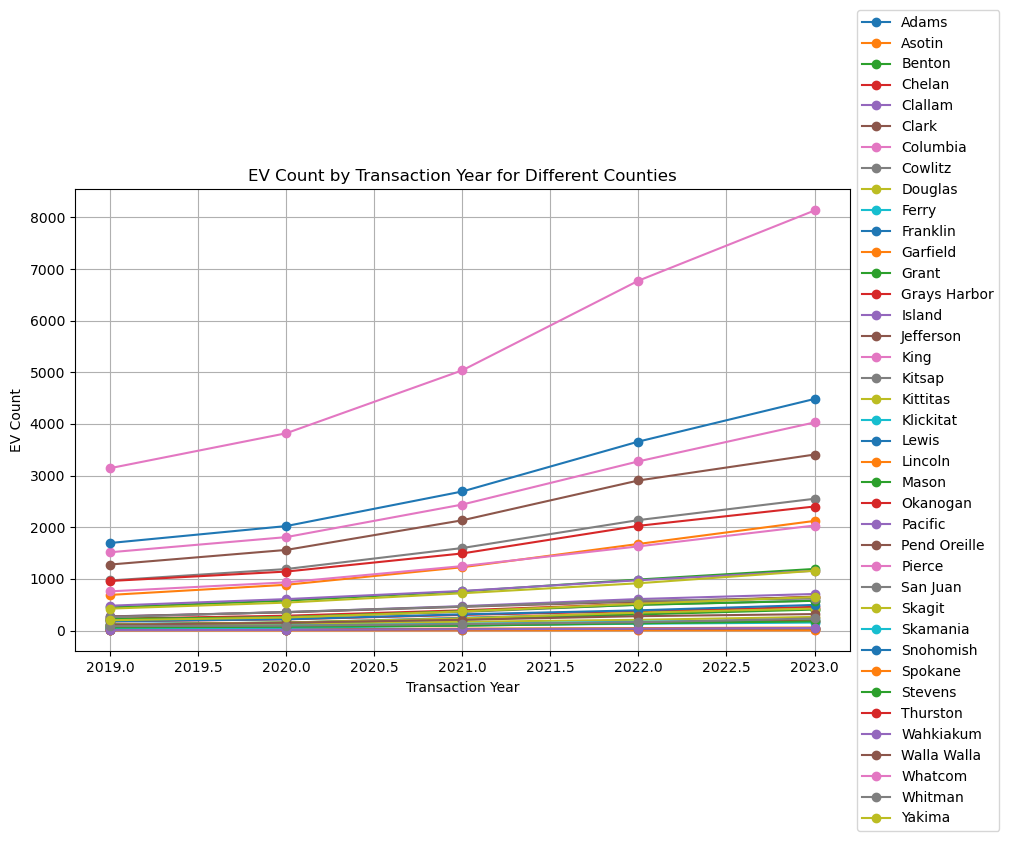

In [17]:
plt.figure(figsize=(10, 6))
for county in ev_count ['County'].unique():
    county_data = ev_count[result['County'] == county]
    plt.plot(county_data['Transaction Year'], county_data['EV_Count'], marker='o', label=county)

plt.title('EV Count by Transaction Year for Different Counties')
plt.xlabel('Transaction Year')
plt.ylabel('EV Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [32]:
ev_count.to_csv('EV_distributionfinal.csv', index=False)

In [19]:
## What factors influence the adoption and growth of EVs in these regions?

In [20]:
df2_filtered = df2[df2['Transaction Year'] >= 2015]
df2_filtered

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,New or Used Vehicle,Transaction Type,DOL Transaction Date,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,New,Original Registration,1/7/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Title,9/7/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Registration,9/7/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/11/2021,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/30/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852935,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Title,7/13/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852936,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Registration,7/13/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852937,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Registration,6/14/2023,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852938,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Title,6/14/2023,...,False,NaN,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [21]:
df2_filtered1 = df2_filtered.dropna(subset=['County', 'Transaction Year', 'VIN (1-10)'])
df2_filtered1

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,New or Used Vehicle,Transaction Type,DOL Transaction Date,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,New,Original Registration,1/7/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Title,9/7/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Registration,9/7/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/11/2021,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/30/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852935,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Title,7/13/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852936,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Registration,7/13/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852937,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Registration,6/14/2023,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852938,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Title,6/14/2023,...,False,NaN,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [22]:
grouped = df2_filtered1 .groupby(['County', 'Transaction Year', 'New or Used Vehicle', 'Clean Alternative Fuel Vehicle Type'])
total_count = grouped['VIN (1-10)'].nunique().reset_index(name='Total_Count')
total_count

,County,Transaction Year,New or Used Vehicle,Clean Alternative Fuel Vehicle Type,Total_Count
0,Adams,2015,New,Plug-in Hybrid Electric Vehicle (PHEV),1
1,Adams,2015,Used,Battery Electric Vehicle (BEV),1
2,Adams,2015,Used,Plug-in Hybrid Electric Vehicle (PHEV),2
3,Adams,2016,New,Plug-in Hybrid Electric Vehicle (PHEV),2
4,Adams,2016,Used,Battery Electric Vehicle (BEV),1
...,...,...,...,...,...
1303,Yakima,2022,Used,Plug-in Hybrid Electric Vehicle (PHEV),161
1304,Yakima,2023,New,Battery Electric Vehicle (BEV),105
1305,Yakima,2023,New,Plug-in Hybrid Electric Vehicle (PHEV),45
1306,Yakima,2023,Used,Battery Electric Vehicle (BEV),314


In [23]:
new_used_counts = total_count.pivot_table(index=['County', 'Transaction Year'], 
                                         columns=['New or Used Vehicle','Clean Alternative Fuel Vehicle Type'],
                                         values='Total_Count', fill_value=0).reset_index()
new_used_counts

New or Used Vehicle                  County Transaction Year  \
Clean Alternative Fuel Vehicle Type                            
0                                     Adams             2015   
1                                     Adams             2016   
2                                     Adams             2017   
3                                     Adams             2018   
4                                     Adams             2019   
..                                      ...              ...   
344                                  Yakima             2019   
345                                  Yakima             2020   
346                                  Yakima             2021   
347                                  Yakima             2022   
348                                  Yakima             2023   

New or Used Vehicle                                            New  \
Clean Alternative Fuel Vehicle Type Battery Electric Vehicle (BEV)   
0                                                                0   
1                                                                0   
2                                                                2   
3                                                                0   
4                                                                2   
..                                                             ...   
344                                                             16   
345                                                             35   
346                                                             60   
347                                                             96   
348                                                            105   

New or Used Vehicle                                           \
Clean Alternative Fuel Vehicle Type Hydrogen Powered Vehicle   
0                                                          0   
1                                                          0   
2                                                          0   
3                                                          0   
4                                                          0   
..                                                       ...   
344                                                        0   
345                                                        0   
346                                                        0   
347                                                        0   
348                                                        0   

New or Used Vehicle                                                         \
Clean Alternative Fuel Vehicle Type Plug-in Hybrid Electric Vehicle (PHEV)   
0                                                                        1   
1                                                                        2   
2                                                                        1   
3                                                                        2   
4                                                                        0   
..                                                                     ...   
344                                                                     12   
345                                                                      9   
346                                                                     24   
347                                                                     34   
348                                                                     45   

New or Used Vehicle                                           Used  \
Clean Alternative Fuel Vehicle Type Battery Electric Vehicle (BEV)   
0                                                                1   
1                                                                1   
2                                                                2   
3                                                         

In [24]:
new_used_counts.to_csv('Infulencing_Factors_By_year.csv', index = False)

In [ ]:
## Registration Make

In [25]:
filtered_make = df2[(df2['Transaction Year'] >= 2019) & 
                 df2['Make'].notnull() & 
                 df2['Transaction Year'].notnull() & 
                 df2['VIN (1-10)'].notnull()]
filtered_make

,Clean Alternative Fuel Vehicle Type,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,Vehicle Primary Use,New or Used Vehicle,Transaction Type,DOL Transaction Date,...,Meets 2019 HB 2042 Sale Price/Value Requirement,2019 HB 2042: Battery Range Requirement,2019 HB 2042: Purchase Date Requirement,2019 HB 2042: Sale Price/Value Requirement,Electric Vehicle Fee Paid,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid,2020 Census Tract,Legislative District,Electric Utility
0,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,New,Original Registration,1/7/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Title,9/7/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Battery Electric Vehicle (BEV),7SAYGDEE8P,251929492,2023,TESLA,Model Y,Passenger,New,Original Registration,9/7/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/11/2021,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Battery Electric Vehicle (BEV),5YJ3E1EC6L,1981598,2020,TESLA,Model 3,Passenger,Used,Registration Renewal,10/30/2020,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",Yes,Yes,No,5.303302e+10,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852935,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Title,7/13/2023,...,False,No battery range,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852936,Battery Electric Vehicle (BEV),7SAYGDEFXP,241482874,2023,TESLA,Model Y,Passenger,New,Original Registration,7/13/2023,...,False,No battery range,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852937,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Registration,6/14/2023,...,False,NaN,"Non-sale, registration transaction","Non-sale, registration transaction",No,No,No,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
852938,Plug-in Hybrid Electric Vehicle (PHEV),JA4T5VA92P,245639628,2023,MITSUBISHI,Outlander,Exempt (State/County/Local/Tribal),New,Original Title,6/14/2023,...,False,NaN,Meets purchase date requirement,Sale price too high,Not Applicable,Not Applicable,Not Applicable,5.303303e+10,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [26]:
result = filtered_make.groupby(['Make', 'Transaction Year']).agg(EV_Count=('VIN (1-10)', 'nunique')).reset_index()
result

,Make,Transaction Year,EV_Count
0,ALFA ROMEO,2023,13
1,AUDI,2019,140
2,AUDI,2020,214
3,AUDI,2021,388
4,AUDI,2022,584
...,...,...,...
160,WHEEGO ELECTRIC CARS,2019,3
161,WHEEGO ELECTRIC CARS,2020,2
162,WHEEGO ELECTRIC CARS,2021,2
163,WHEEGO ELECTRIC CARS,2022,2


In [27]:
result_make = result.sort_values(by=['Make', 'Transaction Year'])
result_make 

,Make,Transaction Year,EV_Count
0,ALFA ROMEO,2023,13
1,AUDI,2019,140
2,AUDI,2020,214
3,AUDI,2021,388
4,AUDI,2022,584
...,...,...,...
160,WHEEGO ELECTRIC CARS,2019,3
161,WHEEGO ELECTRIC CARS,2020,2
162,WHEEGO ELECTRIC CARS,2021,2
163,WHEEGO ELECTRIC CARS,2022,2


In [28]:
result_make.head(10)

,Make,Transaction Year,EV_Count
0,ALFA ROMEO,2023,13
1,AUDI,2019,140
2,AUDI,2020,214
3,AUDI,2021,388
4,AUDI,2022,584
5,AUDI,2023,768
6,AZURE DYNAMICS,2019,5
7,AZURE DYNAMICS,2020,6
8,AZURE DYNAMICS,2021,5
9,AZURE DYNAMICS,2022,6


In [29]:
top_10_makes = result_make.groupby('Make').agg(TOTAL_COUNT=('EV_Count', 'sum')).reset_index()
top_10_makes = top_10_makes.sort_values(by='TOTAL_COUNT', ascending=False).head(10)

In [30]:
top_10_makes

,Make,TOTAL_COUNT
32,TESLA,5390
6,CHEVROLET,3341
36,VOLVO,2820
4,BMW,2757
11,FORD,2457
1,AUDI,2094
17,KIA,1828
14,HYUNDAI,1495
26,NISSAN,1273
28,PORSCHE,1117


In [31]:
result_make.to_csv('Registrations by Make Since 2019.csv', index=False)